<a href="https://colab.research.google.com/github/BrijeshBavda/INSE-6220-/blob/main/Brijesh_Bavda(40195927)_INSE_6220_Project_Win_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiclass Classification of Raisin Using Pycaret** 

In this project i have used Binary classification to classify raisin into one of two classes using pycaret. Binary classification is supervised classification technique which classifies instances in one of two classes. 

In [ ]:
!pip install pycaret==2.3.6

     |████████████████████████████████| 301 kB 5.4 MB/s 
     |████████████████████████████████| 116 kB 45.6 MB/s 
     |████████████████████████████████| 261 kB 18.7 MB/s 
     |████████████████████████████████| 1.7 MB 38.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0 MB 36.1 MB/s 
     |████████████████████████████████| 88 kB 5.3 MB/s 
     |████████████████████████████████| 56 kB 4.6 MB/s 
     |████████████████████████████████| 167 kB 64.7 MB/s 
     |████████████████████████████████| 16.8 MB 50.6 MB/s 
     |████████████████████████████████| 6.8 MB 49.1 MB/s 
     |████████████████████████████████| 1.3 MB 49.4 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 690 kB 58.5 MB/s 
     |████████████████████████████████| 636 kB 55.4 MB/s 
     |███████████████████

In [ ]:
from pycaret.utils import version
version()

'2.3.6'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Data Set**

In this data set machine vision system was used to distinguish between two different variety of Raisin produced in Turkey - Besni and kecimen.
firstly, a total of 900 raisin seed were collected with equal amount of both raisin seeds. later, it was classified based on 7 features using image processing method. Image processing was performed in MATLAB software. The images collected by camera were firsly converted to grayscale image and then to binary image to extract 7 features.

To construct the data following 7 features were used:

**Area**: Gives the number of pixels within the boundaries of the raisin grain.

**Perimeter**: It measures the environment by calculating the distance between the boundaries of the raisin grain and the pixels around it.

**MajorAxisLength**: Gives the length of the main axis, which is the longest line that can be drawn on the raisin grain.

**MinorAxisLength**: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin grain.

**Eccentricity**: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.

**ConvexArea**: Gives the number of pixels of the smallest convex shell of the region formed by the raisin grain.

**Extent**: Gives the ratio of the region formed by the raisin grain to the total pixels in the bounding box.

**Resource**: https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset

**Citation**:

CINAR I., KOKLU M. and TASDEMIR S., (2020). Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods, Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020, DOI: https://doi.org/10.30855/gmbd.2020.03.03


In [ ]:
!pip install -q xlrd
import pandas as pd
df = pd.read_excel('Raisin_Dataset.xlsx')
df.head(25)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   87524       442.246011       253.291155      0.819738       90546   
1   75166       406.690687       243.032436      0.801805       78789   
2   90856       442.267048       266.328318      0.798354       93717   
3   45928       286.540559       208.760042      0.684989       47336   
4   79408       352.190770       290.827533      0.564011       81463   
5   49242       318.125407       200.122120      0.777351       51368   
6   42492       310.146072       176.131449      0.823099       43904   
7   60952       332.455472       235.429835      0.706058       62329   
8   42256       323.189607       172.575926      0.845499       44743   
9   64380       366.964842       227.771615      0.784056       66125   
10  80437       449.454581       232.325506      0.856043       84460   
11  43725       301.322218       186.950629      0.784258       45021   
12  43441       276.610829       201.813135      0.683882       45133   
13  76792       338.857545       291.359202      0.510584       78842   
14  74167       387.798931       247.858123      0.769090       76807   
15  33565       261.554331       167.708491      0.767374       35794   
16  64670       403.083975       206.484644      0.858829       66419   
17  64762       354.293940       235.752463      0.746474       66713   
18  43295       304.284467       182.811037      0.799407       44714   
19  70699       418.698572       216.596054      0.855799       72363   
20  69726       354.176912       252.529208      0.701161       71849   
21  57346       330.478438       222.443748      0.739555       59365   
22  82028       397.114976       268.333773      0.737169       84427   
23  61251       301.507790       273.659941      0.419754       64732   
24  96277       447.134523       275.216154      0.788128       97865   

      Extent  Perimeter    Class  
0   0.758651   1184.040  Kecimen  
1   0.684130   1121.786  Kecimen  
2   0.637613   1208.575  Kecimen  
3   0.699599    844.162  Kecimen  
4   0.792772   1073.251  Kecimen  
5   0.658456    881.836  Kecimen  
6   0.665894    823.796  Kecimen  
7   0.743598    933.366  Kecimen  
8   0.698031    849.728  Kecimen  
9   0.664376    981.544  Kecimen  
10  0.674236   1176.305  Kecimen  
11  0.697068    818.873  Kecimen  
12  0.690856    803.748  Kecimen  
13  0.772322   1042.770  Kecimen  
14  0.680182   1084.729  Kecimen  
15  0.681551    751.413  Kecimen  
16  0.756773   1028.445  Kecimen  
17  0.694998    981.509  Kecimen  
18  0.713838    814.680  Kecimen  
19  0.728075   1061.321  Kecimen  
20  0.734399   1035.501  Kecimen  
21  0.723609    928.272  Kecimen  
22  0.686375   1106.355  Kecimen  
23  0.643596    971.769  Kecimen  
24  0.704057   1181.921  Kecimen

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [ ]:
# to change class column into unique values 
df ['Class'].unique()
# to count the class variables 
df ['Class'][df['Class']=='Kecimen'].value_counts()
df ['Class'][df ['Class']=='Besni'].value_counts()

labels, levels = pd.factorize(df['Class'])
df['Class']= labels

In [ ]:
# to convert string to numeric     


for i in range(0, len(df.columns)):
	df.iloc[:,i] = pd.to_numeric(df.iloc[:,i], errors='ignore')

In [ ]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [ ]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

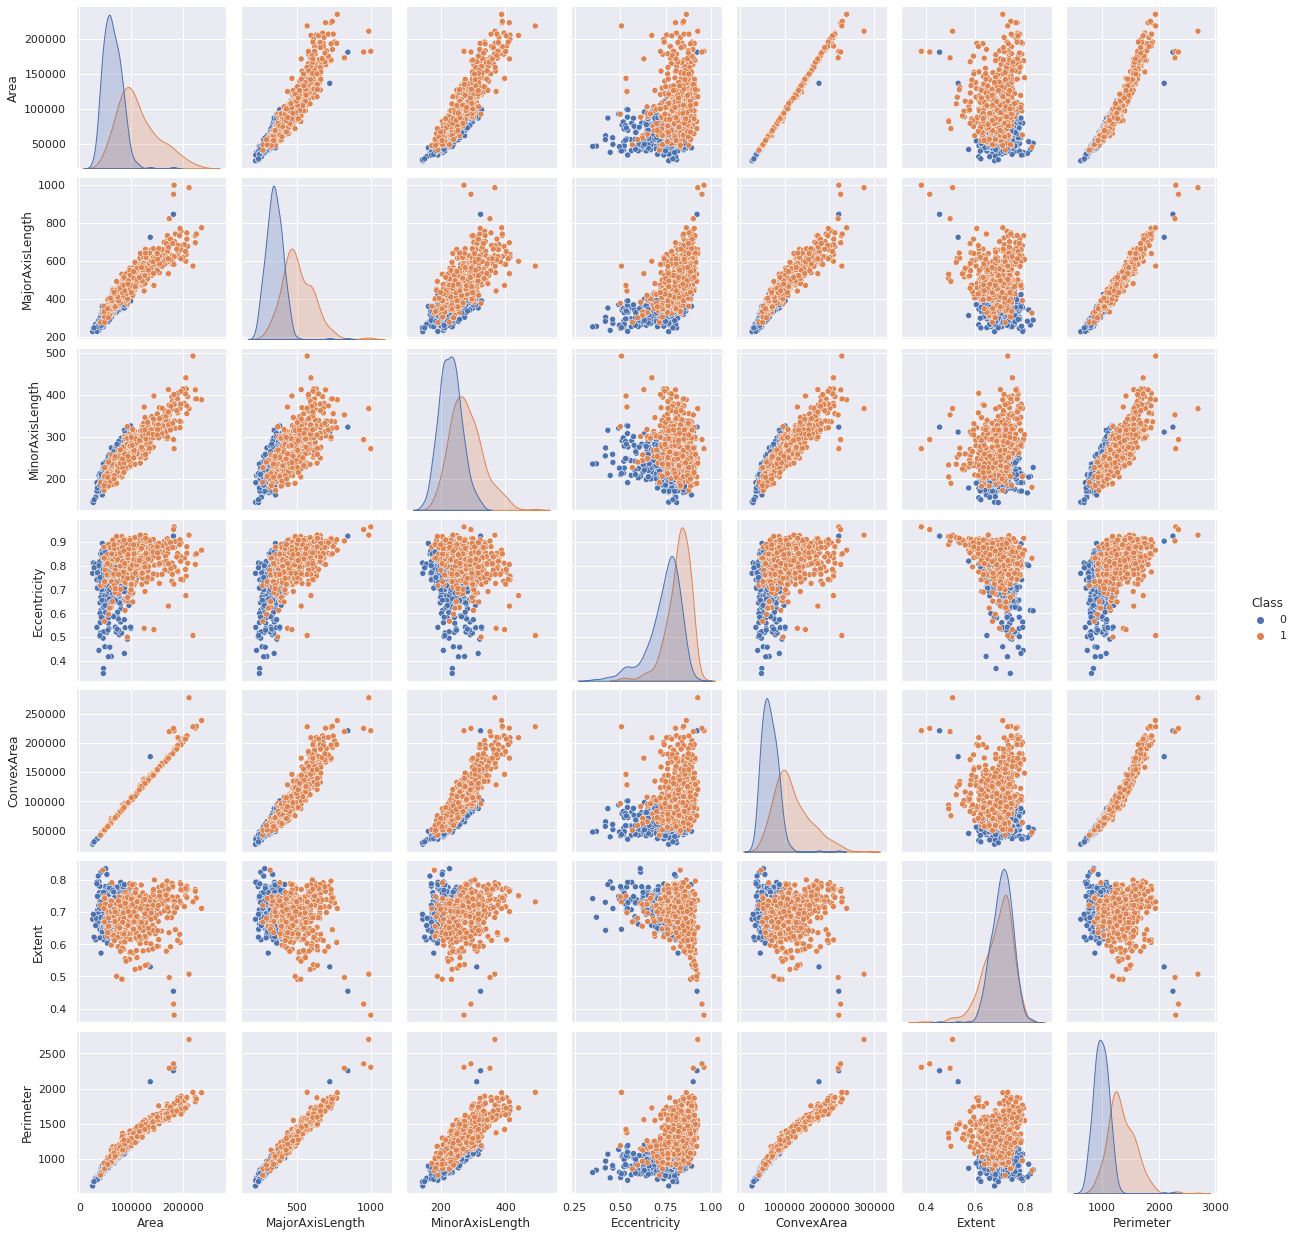

In [ ]:
sns.pairplot(df, hue='Class')
plt.show()

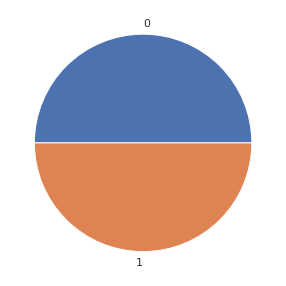

In [ ]:
y =df['Class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [ ]:
X = df.drop(columns=['Class'])
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   
5  49242       318.125407       200.122120      0.777351       51368   
6  42492       310.146072       176.131449      0.823099       43904   
7  60952       332.455472       235.429835      0.706058       62329   
8  42256       323.189607       172.575926      0.845499       44743   
9  64380       366.964842       227.771615      0.784056       66125   

     Extent  Perimeter  
0  0.758651   1184.040  
1  0.684130   1121.786  
2  0.637613   1208.575  
3  0.699599    844.162  
4  0.792772   1073.251  
5  0.658456    881.836  
6  0.665894    823.796  
7  0.743598    933.366  
8  0.698031    849.728  
9  0.664376    981.544

In [ ]:
X.describe().transpose()

count          mean           std           min  \
Area             900.0  87804.127778  39002.111390  25387.000000   
MajorAxisLength  900.0    430.929950    116.035121    225.629541   
MinorAxisLength  900.0    254.488133     49.988902    143.710872   
Eccentricity     900.0      0.781542      0.090318      0.348730   
ConvexArea       900.0  91186.090000  40769.290132  26139.000000   
Extent           900.0      0.699508      0.053468      0.379856   
Perimeter        900.0   1165.906636    273.764315    619.074000   

                          25%           50%            75%            max  
Area             59348.000000  78902.000000  105028.250000  235047.000000  
MajorAxisLength    345.442898    407.803951     494.187014     997.291941  
MinorAxisLength    219.111126    247.848409     279.888575     492.275279  
Eccentricity         0.741766      0.798846       0.842571       0.962124  
ConvexArea       61513.250000  81651.000000  108375.750000  278217.000000  
Extent               0.670869      0.707367       0.734991       0.835455  
Perimeter          966.410750   1119.509000    1308.389750    2697.753000

**Standardize the data**

In [ ]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0 -0.007186         0.097577        -0.023958      0.423142   -0.015709   
1 -0.324217        -0.209012        -0.229292      0.224476   -0.304248   
2  0.078292         0.097758         0.236988      0.186239    0.062113   
3 -1.074286        -1.245051        -0.915273     -1.069623   -1.076165   
4 -0.215393        -0.678958         0.727354     -2.409827   -0.238623   
5 -0.989269        -0.972699        -1.088166     -0.046427   -0.977212   
6 -1.162433        -1.041504        -1.568353      0.460367   -1.160393   
7 -0.688862        -0.849133        -0.381463     -0.836226   -0.708208   
8 -1.168487        -0.929031        -1.639519      0.708518   -1.139802   
9 -0.600920        -0.551563        -0.534746      0.027845   -0.615047   

     Extent  Perimeter  
0  1.106743   0.066274  
1 -0.287777  -0.161252  
2 -1.158250   0.155945  
3  0.001711  -1.175915  
4  1.745259  -0.338639  
5 -0.768202  -1.038224  
6 -0.629029  -1.250349  
7  0.825066  -0.849891  
8 -0.027639  -1.155572  
9 -0.657433  -0.673810

In [ ]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Area             900.0  8.590813e-16  1.000556 -1.601242 -0.730010 -0.228374   
MajorAxisLength  900.0  9.967336e-17  1.000556 -1.770279 -0.737144 -0.199413   
MinorAxisLength  900.0 -1.076793e-15  1.000556 -2.217269 -0.708091 -0.132898   
Eccentricity     900.0  9.029814e-16  1.000556 -4.794739 -0.440641  0.191694   
ConvexArea       900.0 -3.103999e-17  1.000556 -1.596379 -0.728228 -0.234009   
Extent           900.0  1.368288e-15  1.000556 -5.981678 -0.535921  0.147067   
Perimeter        900.0  8.049117e-17  1.000556 -1.998568 -0.729119 -0.169574   

                      75%       max  
Area             0.441866  3.777353  
MajorAxisLength  0.545458  4.883667  
MinorAxisLength  0.508404  4.759444  
Eccentricity     0.676084  2.000508  
ConvexArea       0.421867  4.590095  
Extent           0.664006  2.543983  
Perimeter        0.520748  5.598604

**Observations and variables**

In [ ]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker plots**

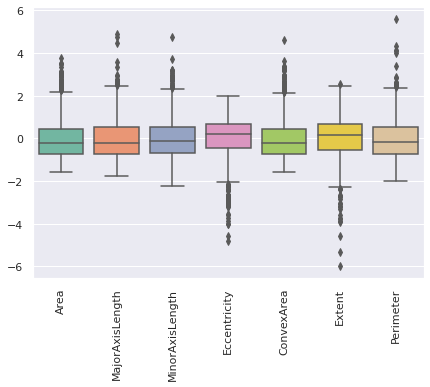

In [ ]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

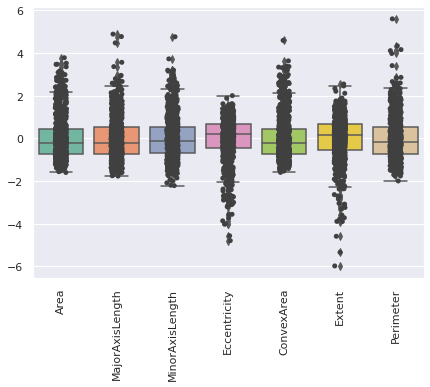

In [ ]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

**Coorelation Matrix**

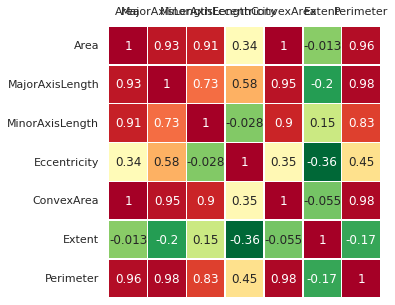

In [ ]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

# **Principal Component Analysis**

Text(0, 0.5, '$Z_2$')

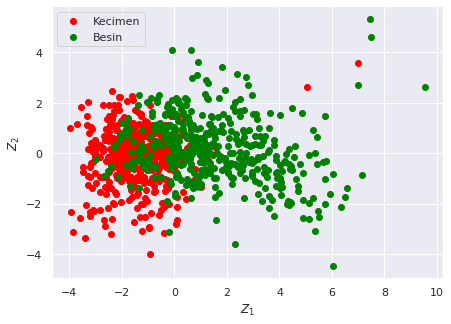

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

idx_1 = np.where(y == 0)
idx_2 = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_1,0], Z[idx_1,1], c='red', label='Kecimen')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='green', label='Besin')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')



**Eigen vectors**

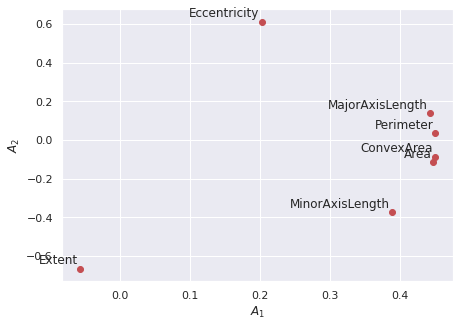

In [ ]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


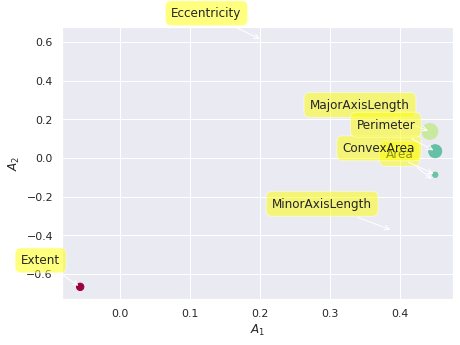

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

Text(0, 0.5, 'Explained variance')

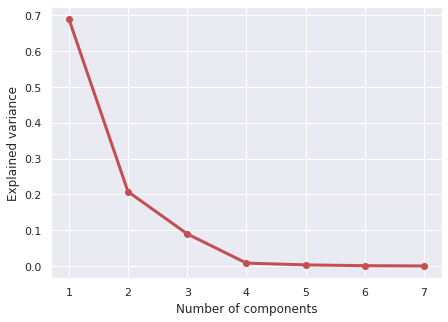

In [ ]:
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

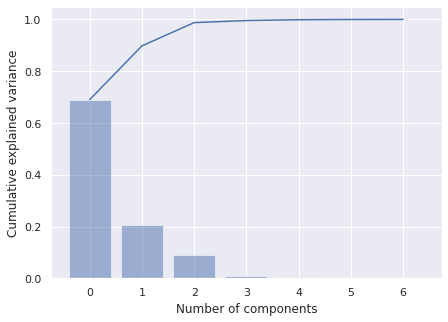

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

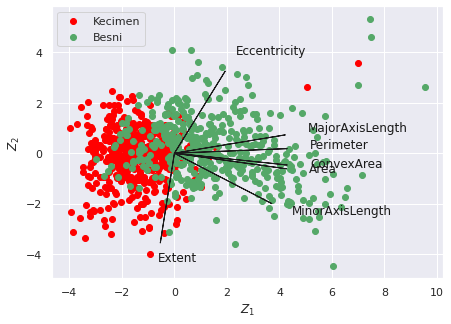

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_1,0], Z[idx_1,1], c='red', label='Kecimen')
plt.scatter(Z[idx_2,0], Z[idx_2,1], c='g', label='Besni')
plt.legend(loc='upper left')

# **Using PCA Library**

In [ ]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=445b3baaec4fd601f2e45b77929a8a12f89353a4f223fb0ba8ef29bdf301c113
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3
0    0.076994 -0.453328 -1.089214
1   -0.475376  0.445368  0.016372
2    0.372109  0.802008  0.786487
3   -2.622445 -0.302564  0.482721
4   -0.962054 -2.967763  0.452154
..        ...       ...       ...
895 -0.114629  0.694645  0.129914
896  0.273577  0.953934  0.696489
897  0.682451 -1.308199  0.091732
898  0.648410  0.979248  0.091413
899  0.487555  2.108116 -0.191941

[900 rows x 3 columns]

**Scatter Plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1c6c2cae10>)

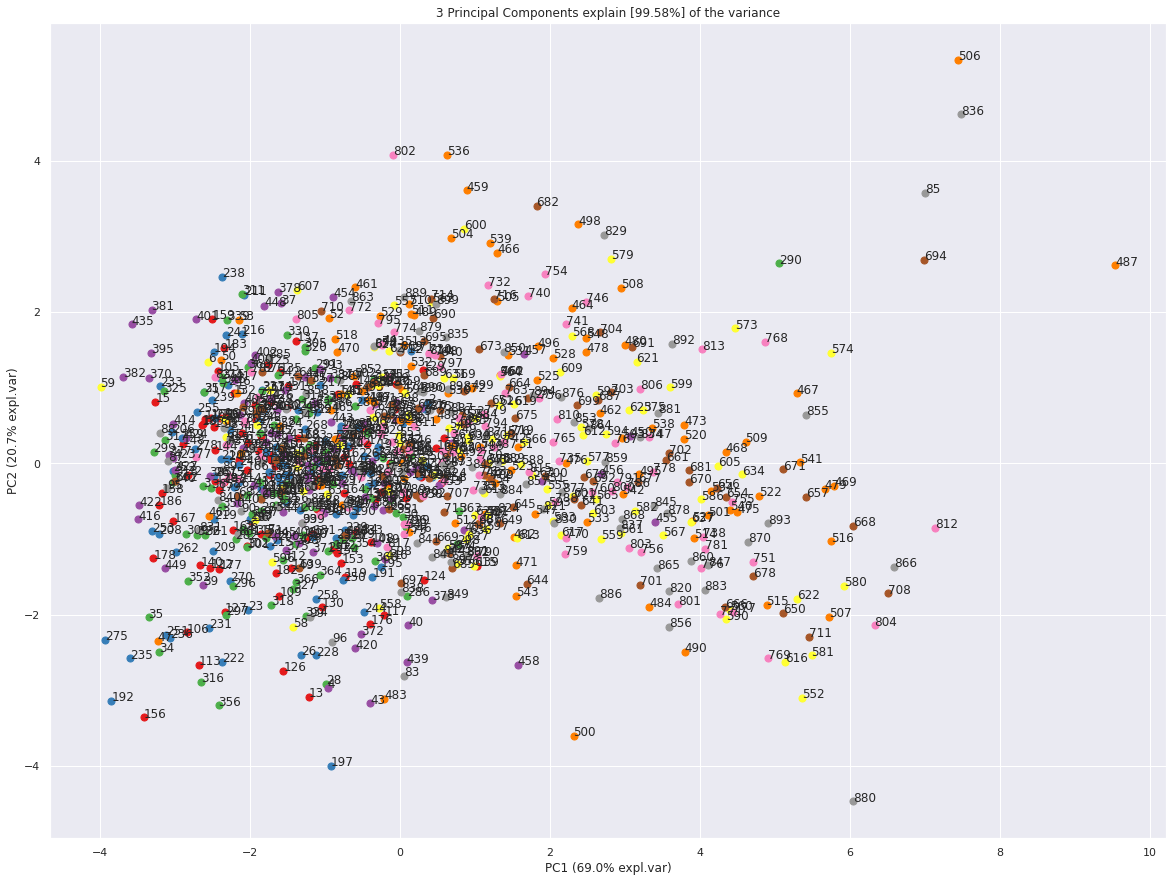

In [ ]:
model.scatter(label=True, legend=False)

**Eigen Vectors**

In [ ]:
A = out['loadings'].T

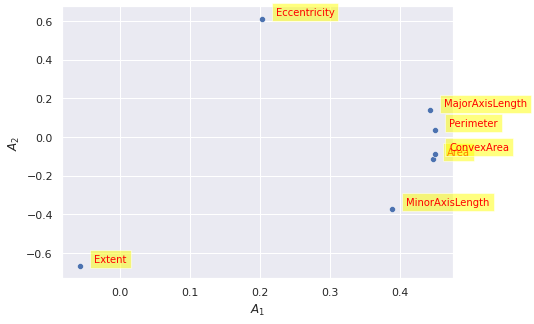

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

In [ ]:
print(f'Eigenvectors:\n{A}')
print(f'Eigenvalues:\n{Lambda}')

Eigenvectors:
                      PC1       PC2       PC3
Area             0.448284 -0.116100  0.005484
MajorAxisLength  0.443240  0.136587 -0.100548
MinorAxisLength  0.389381 -0.374922  0.236044
Eccentricity     0.202971  0.610823 -0.628522
ConvexArea       0.450938 -0.087616  0.036672
Extent          -0.056368 -0.667344 -0.731981
Perimeter        0.450824  0.034172  0.044301
Eigenvalues:
[4.83766379e+00 1.45480489e+00 6.29148522e-01 5.68877209e-02
 2.18325269e-02 6.43734371e-03 1.01163378e-03]


**Scree Plot**

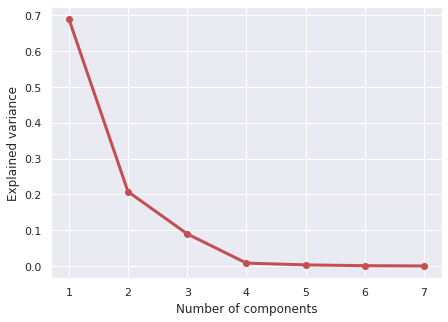

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

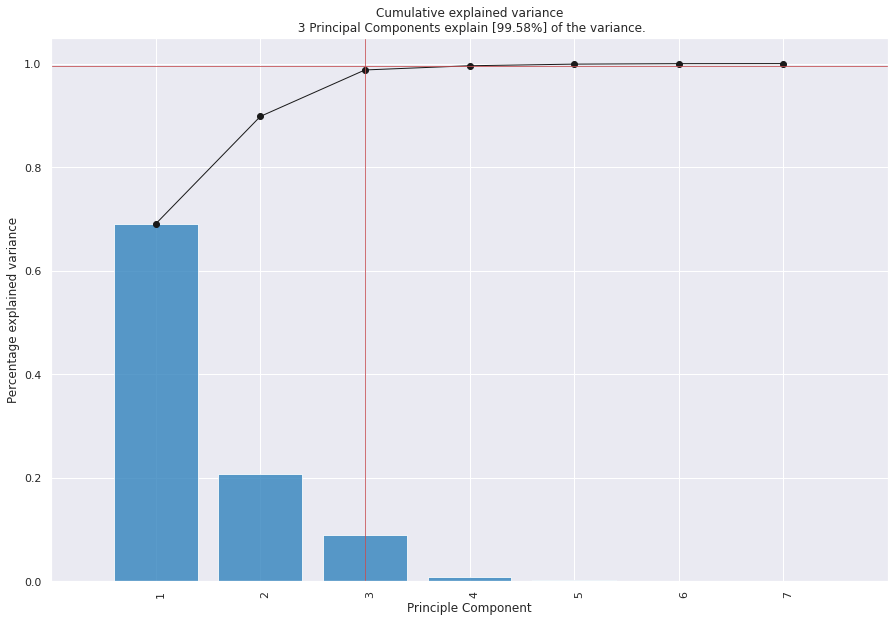

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


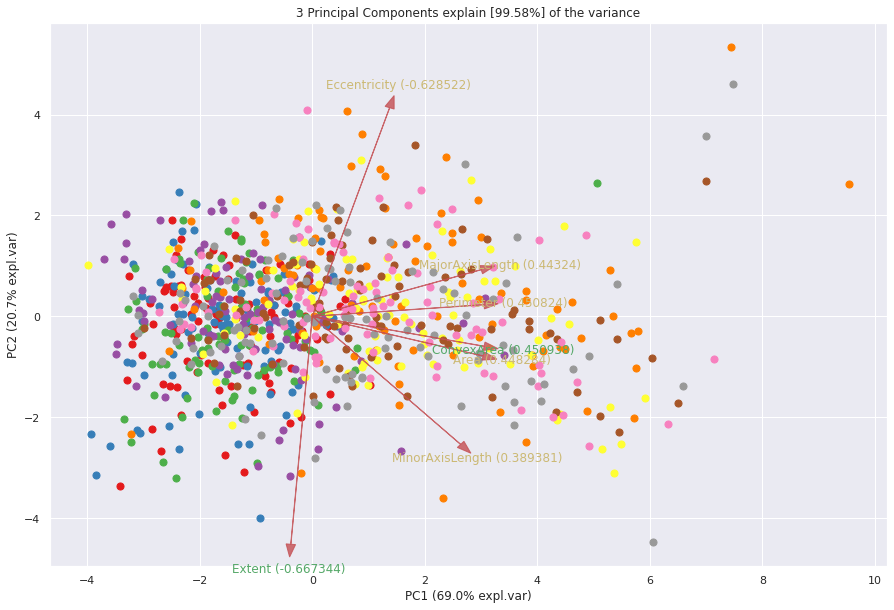

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1c6be8e0d0>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.


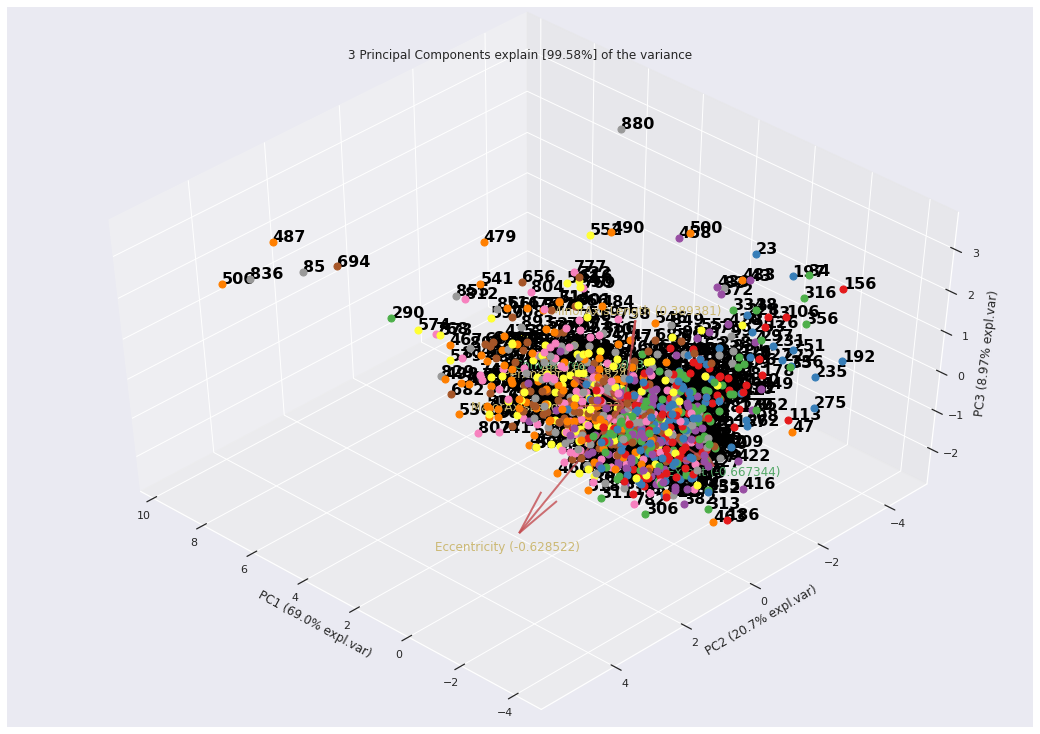

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f1c6bdfbf90>)

In [ ]:
model.biplot3d(legend=False)

# **Classification**

**Using Pycaret**

In [ ]:
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 90 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 90 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (810, 8)
Unseen Data For Predictions: (90, 8)


**Setting up the environment in Pycaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='Class', train_size=0.7, session_id=5927)

Description             Value
0                               session_id              5927
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (810, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (566, 6)
12                    Transformed Test Set          (244, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              44f3
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE



Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

session_id : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 5927 for later reproducibility.

Target Type : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

Label Encoded : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference.

Original Data : Displays the original shape of the dataset. In this experiment (810, 8) means 810 samples and 8 features including the class column.

Missing Values : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

Numeric Features : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

Categorical Features : The number of features inferred as categorical. In this dataset, there are no categorical features.

Transformed Train Set : Displays the shape of the transformed training set. Notice that the original shape of (810, 8) is transformed into (566, 6) for the transformed train set.

Transformed Test Set : Displays the shape of the transformed test/hold-out set. There are 244 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline.


In [ ]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8622  0.9276  0.8214  0.8799   
lda          Linear Discriminant Analysis    0.8604  0.9192  0.8215  0.8770   
ridge                    Ridge Classifier    0.8568  0.0000  0.7984  0.8887   
qda       Quadratic Discriminant Analysis    0.8533  0.9235  0.7493  0.9225   
lightgbm  Light Gradient Boosting Machine    0.8446  0.9241  0.8179  0.8510   
et                 Extra Trees Classifier    0.8445  0.9186  0.8103  0.8552   
ada                  Ada Boost Classifier    0.8427  0.9161  0.8027  0.8609   
rf               Random Forest Classifier    0.8374  0.9257  0.7836  0.8591   
gbc          Gradient Boosting Classifier    0.8341  0.9231  0.7842  0.8544   
nb                            Naive Bayes    0.8267  0.9078  0.7228  0.8854   
dt               Decision Tree Classifier    0.8128  0.8129  0.8182  0.7937   
knn                K Neighbors Classifier    0.7684  0.8472  0.7264  0.7679   
dummy                    Dummy Classifier    0.5336  0.5000  0.0000  0.0000   
svm                   SVM - Linear Kernel    0.4860  0.0000  0.7000  0.3262   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8471  0.7217  0.7263     0.334  
lda       0.8462  0.7184  0.7228     0.014  
ridge     0.8382  0.7103  0.7173     0.015  
qda       0.8241  0.7011  0.7146     0.016  
lightgbm  0.8313  0.6871  0.6914     0.091  
et        0.8290  0.6865  0.6912     0.463  
ada       0.8262  0.6828  0.6903     0.111  
rf        0.8167  0.6712  0.6767     0.515  
gbc       0.8149  0.6650  0.6706     0.132  
nb        0.7908  0.6468  0.6606     0.014  
dt        0.8036  0.6248  0.6283     0.017  
knn       0.7414  0.5324  0.5384     0.118  
dummy     0.0000  0.0000  0.0000     0.015  
svm       0.4450  0.0000  0.0000     0.015

In [ ]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5927, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create Logistic Regression**

In [ ]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.9082  0.6923  0.9000  0.7826  0.6397  0.6552
1       0.8947  0.9491  0.8462  0.9167  0.8800  0.7865  0.7885
2       0.8421  0.8543  0.8889  0.8000  0.8421  0.6851  0.6889
3       0.8596  0.9691  0.8889  0.8276  0.8571  0.7196  0.7213
4       0.8596  0.9309  0.8519  0.8519  0.8519  0.7185  0.7185
5       0.9123  0.9185  0.8148  1.0000  0.8980  0.8224  0.8357
6       0.8750  0.9628  0.8077  0.9130  0.8571  0.7468  0.7512
7       0.9107  0.9410  0.8846  0.9200  0.9020  0.8201  0.8206
8       0.8393  0.9026  0.7692  0.8696  0.8163  0.6744  0.6784
9       0.8036  0.9397  0.7692  0.8000  0.7843  0.6041  0.6045
Mean    0.8622  0.9276  0.8214  0.8799  0.8471  0.7217  0.7263
SD      0.0345  0.0320  0.0608  0.0594  0.0400  0.0699  0.0700

**Tune Logistic Regression**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.9107  0.7308  0.8636  0.7917  0.6420  0.6486
1       0.8947  0.9504  0.8462  0.9167  0.8800  0.7865  0.7885
2       0.8421  0.8556  0.8889  0.8000  0.8421  0.6851  0.6889
3       0.8596  0.9691  0.8889  0.8276  0.8571  0.7196  0.7213
4       0.8596  0.9309  0.8519  0.8519  0.8519  0.7185  0.7185
5       0.9123  0.9198  0.8148  1.0000  0.8980  0.8224  0.8357
6       0.8750  0.9628  0.8462  0.8800  0.8627  0.7481  0.7486
7       0.8929  0.9410  0.8846  0.8846  0.8846  0.7846  0.7846
8       0.8571  0.9038  0.8077  0.8750  0.8400  0.7113  0.7132
9       0.8036  0.9410  0.7692  0.8000  0.7843  0.6041  0.6045
Mean    0.8622  0.9285  0.8329  0.8699  0.8492  0.7222  0.7252
SD      0.0316  0.0315  0.0501  0.0560  0.0353  0.0638  0.0650

**Evaluate Logistic regression**

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Craete Decision Tree Model**

In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8070  0.8071  0.8077  0.7778  0.7925  0.6122  0.6126
1       0.8947  0.8908  0.8462  0.9167  0.8800  0.7865  0.7885
2       0.7895  0.7889  0.7778  0.7778  0.7778  0.5778  0.5778
3       0.8070  0.8111  0.8889  0.7500  0.8136  0.6165  0.6261
4       0.7544  0.7593  0.8519  0.6970  0.7667  0.5128  0.5244
5       0.8070  0.8037  0.7407  0.8333  0.7843  0.6108  0.6143
6       0.7857  0.7897  0.8462  0.7333  0.7857  0.5736  0.5795
7       0.8750  0.8756  0.8846  0.8519  0.8679  0.7494  0.7498
8       0.7857  0.7821  0.7308  0.7917  0.7600  0.5670  0.5685
9       0.8214  0.8205  0.8077  0.8077  0.8077  0.6410  0.6410
Mean    0.8128  0.8129  0.8182  0.7937  0.8036  0.6248  0.6283
SD      0.0402  0.0389  0.0525  0.0597  0.0385  0.0794  0.0777

In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5927, splitter='best')

In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8070  0.7916  0.6154  0.9412  0.7442  0.5999  0.6349
1       0.9123  0.9038  0.8077  1.0000  0.8936  0.8204  0.8340
2       0.8070  0.8000  0.6667  0.9000  0.7660  0.6079  0.6277
3       0.8947  0.8981  0.9630  0.8387  0.8966  0.7904  0.7983
4       0.8246  0.8259  0.8519  0.7931  0.8214  0.6494  0.6510
5       0.8421  0.8333  0.6667  1.0000  0.8000  0.6780  0.7161
6       0.8214  0.8103  0.6538  0.9444  0.7727  0.6335  0.6626
7       0.8929  0.8872  0.8077  0.9545  0.8750  0.7824  0.7907
8       0.7857  0.7718  0.5769  0.9375  0.7143  0.5579  0.6001
9       0.8036  0.8013  0.7692  0.8000  0.7843  0.6041  0.6045
Mean    0.8391  0.8323  0.7379  0.9109  0.8068  0.6724  0.6920
SD      0.0425  0.0451  0.1151  0.0721  0.0603  0.0879  0.0824

In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.4, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=9,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5927, splitter='best')

In [ ]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7895  0.8759  0.6538  0.8500  0.7391  0.5676  0.5814
1       0.9123  0.9789  0.8462  0.9565  0.8980  0.8215  0.8263
2       0.8070  0.8796  0.7778  0.8077  0.7925  0.6122  0.6126
3       0.8596  0.9630  0.8889  0.8276  0.8571  0.7196  0.7213
4       0.8246  0.9222  0.8519  0.7931  0.8214  0.6494  0.6510
5       0.8596  0.9321  0.7407  0.9524  0.8333  0.7154  0.7322
6       0.8750  0.9468  0.8462  0.8800  0.8627  0.7481  0.7486
7       0.8393  0.9391  0.8077  0.8400  0.8235  0.6761  0.6765
8       0.7857  0.8974  0.6538  0.8500  0.7391  0.5625  0.5765
9       0.8214  0.9218  0.7692  0.8333  0.8000  0.6392  0.6408
Mean    0.8374  0.9257  0.7836  0.8591  0.8167  0.6712  0.6767
SD      0.0378  0.0321  0.0774  0.0527  0.0486  0.0777  0.0760

**Tune Random Forest**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.9163  0.6923  0.9000  0.7826  0.6397  0.6552
1       0.9474  0.9665  0.8846  1.0000  0.9388  0.8929  0.8981
2       0.8246  0.8685  0.8148  0.8148  0.8148  0.6481  0.6481
3       0.8596  0.9654  0.9259  0.8065  0.8621  0.7206  0.7277
4       0.8246  0.9198  0.8519  0.7931  0.8214  0.6494  0.6510
5       0.8947  0.9179  0.7778  1.0000  0.8750  0.7865  0.8051
6       0.8929  0.9449  0.8077  0.9545  0.8750  0.7824  0.7907
7       0.8571  0.9353  0.8077  0.8750  0.8400  0.7113  0.7132
8       0.8571  0.8910  0.7692  0.9091  0.8333  0.7098  0.7174
9       0.8036  0.9410  0.7692  0.8000  0.7843  0.6041  0.6045
Mean    0.8586  0.9267  0.8101  0.8853  0.8427  0.7145  0.7211
SD      0.0411  0.0293  0.0625  0.0768  0.0448  0.0825  0.0846

**Evaluate Random Forest**

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Tune the Best Model**

In [ ]:
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.9107  0.7308  0.8636  0.7917  0.6420  0.6486
1       0.8947  0.9504  0.8462  0.9167  0.8800  0.7865  0.7885
2       0.8421  0.8556  0.8889  0.8000  0.8421  0.6851  0.6889
3       0.8596  0.9691  0.8889  0.8276  0.8571  0.7196  0.7213
4       0.8596  0.9309  0.8519  0.8519  0.8519  0.7185  0.7185
5       0.9123  0.9198  0.8148  1.0000  0.8980  0.8224  0.8357
6       0.8750  0.9628  0.8462  0.8800  0.8627  0.7481  0.7486
7       0.8929  0.9410  0.8846  0.8846  0.8846  0.7846  0.7846
8       0.8571  0.9038  0.8077  0.8750  0.8400  0.7113  0.7132
9       0.8036  0.9410  0.7692  0.8000  0.7843  0.6041  0.6045
Mean    0.8622  0.9285  0.8329  0.8699  0.8492  0.7222  0.7252
SD      0.0316  0.0315  0.0501  0.0560  0.0353  0.0638  0.0650

In [ ]:
tuned_best_model

LogisticRegression(C=4.977, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5927, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create K Neighbour**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7719  0.8629  0.6923  0.7826  0.7347  0.5360  0.5391
1       0.7719  0.8734  0.8462  0.7097  0.7719  0.5473  0.5558
2       0.7719  0.8500  0.7778  0.7500  0.7636  0.5434  0.5438
3       0.8070  0.9031  0.8519  0.7667  0.8070  0.6151  0.6185
4       0.7544  0.8302  0.7407  0.7407  0.7407  0.5074  0.5074
5       0.8421  0.8642  0.7778  0.8750  0.8235  0.6816  0.6854
6       0.7857  0.8269  0.6154  0.8889  0.7273  0.5602  0.5860
7       0.8214  0.8923  0.8462  0.7857  0.8148  0.6429  0.6445
8       0.6607  0.7481  0.5000  0.6842  0.5778  0.3055  0.3160
9       0.6964  0.8205  0.6154  0.6957  0.6531  0.3850  0.3873
Mean    0.7684  0.8472  0.7264  0.7679  0.7414  0.5324  0.5384
SD      0.0520  0.0420  0.1127  0.0658  0.0726  0.1078  0.1073

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7719  0.8852  0.6538  0.8095  0.7234  0.5331  0.5419
1       0.8772  0.9206  0.8462  0.8800  0.8627  0.7517  0.7522
2       0.7895  0.8642  0.7407  0.8000  0.7692  0.5762  0.5777
3       0.8246  0.9284  0.8889  0.7742  0.8276  0.6507  0.6572
4       0.8070  0.8932  0.7407  0.8333  0.7843  0.6108  0.6143
5       0.8421  0.8735  0.7037  0.9500  0.8085  0.6792  0.7014
6       0.7679  0.8962  0.5769  0.8824  0.6977  0.5223  0.5535
7       0.8571  0.9096  0.7692  0.9091  0.8333  0.7098  0.7174
8       0.6964  0.8013  0.5000  0.7647  0.6047  0.3753  0.3977
9       0.7679  0.8635  0.6538  0.8095  0.7234  0.5273  0.5362
Mean    0.8002  0.8836  0.7074  0.8413  0.7635  0.5936  0.6049
SD      0.0503  0.0346  0.1114  0.0581  0.0736  0.1051  0.1007

In [ ]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Evaluate the best model**

In [ ]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='Class', train_size=0.7, session_id=5927, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id              5927
1                                   Target             Class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data          (810, 8)
5                           Missing Values             False
6                         Numeric Features                 7
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set          (566, 3)
12                    Transformed Test Set          (244, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              5033
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [ ]:
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.8587  0.9206  0.8291  0.8682   
nb                            Naive Bayes    0.8516  0.9191  0.7537  0.9179   
rf               Random Forest Classifier    0.8516  0.9023  0.7989  0.8786   
et                 Extra Trees Classifier    0.8515  0.9078  0.7952  0.8788   
ridge                    Ridge Classifier    0.8498  0.0000  0.7761  0.8923   
lda          Linear Discriminant Analysis    0.8498  0.9183  0.7761  0.8923   
svm                   SVM - Linear Kernel    0.8446  0.0000  0.7990  0.8661   
qda       Quadratic Discriminant Analysis    0.8409  0.9056  0.7380  0.9063   
knn                K Neighbors Classifier    0.8392  0.8914  0.7726  0.8728   
lightgbm  Light Gradient Boosting Machine    0.8392  0.8946  0.7950  0.8521   
ada                  Ada Boost Classifier    0.8355  0.9006  0.7873  0.8519   
gbc          Gradient Boosting Classifier    0.8286  0.9081  0.7722  0.8524   
dt               Decision Tree Classifier    0.7809  0.7799  0.7652  0.7681   
dummy                    Dummy Classifier    0.5336  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
lr        0.8456  0.7153  0.7197     0.018  
nb        0.8241  0.6982  0.7119     0.014  
rf        0.8343  0.7002  0.7060     0.499  
et        0.8337  0.6999  0.7042     0.467  
ridge     0.8275  0.6955  0.7035     0.013  
lda       0.8275  0.6955  0.7035     0.015  
svm       0.8264  0.6863  0.6938     0.014  
qda       0.8110  0.6762  0.6894     0.014  
knn       0.8181  0.6747  0.6806     0.116  
lightgbm  0.8212  0.6753  0.6783     0.052  
ada       0.8168  0.6679  0.6716     0.105  
gbc       0.8080  0.6536  0.6590     0.105  
dt        0.7637  0.5597  0.5634     0.016  
dummy     0.0000  0.0000  0.0000     0.014

In [ ]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5927, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### **Tune the best model**

In [ ]:
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9020  0.7692  0.8696  0.8163  0.6788  0.6827
1       0.8947  0.9529  0.8846  0.8846  0.8846  0.7878  0.7878
2       0.8246  0.8543  0.8519  0.7931  0.8214  0.6494  0.6510
3       0.8772  0.9667  0.9630  0.8125  0.8814  0.7560  0.7677
4       0.8070  0.9296  0.8148  0.7857  0.8000  0.6137  0.6141
5       0.8947  0.9210  0.8148  0.9565  0.8800  0.7873  0.7953
6       0.8929  0.9487  0.8077  0.9545  0.8750  0.7824  0.7907
7       0.9107  0.9333  0.8462  0.9565  0.8980  0.8191  0.8240
8       0.8571  0.8923  0.8077  0.8750  0.8400  0.7113  0.7132
9       0.8036  0.9038  0.7692  0.8000  0.7843  0.6041  0.6045
Mean    0.8605  0.9205  0.8329  0.8688  0.8481  0.7190  0.7231
SD      0.0373  0.0317  0.0549  0.0660  0.0385  0.0746  0.0768

In [ ]:
tuned_best_model_pca

LogisticRegression(C=8.674999999999999, class_weight={}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5927, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the best model**

In [ ]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# **Explainable AI with shapely values**

In [ ]:
!pip install shap

     |████████████████████████████████| 564 kB 5.0 MB/s 


In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8421  0.9032  0.7692  0.8696  0.8163  0.6788  0.6827
1       0.9123  0.9529  0.8077  1.0000  0.8936  0.8204  0.8340
2       0.8070  0.8136  0.8148  0.7857  0.8000  0.6137  0.6141
3       0.8772  0.9525  0.8889  0.8571  0.8727  0.7542  0.7546
4       0.8246  0.9210  0.8519  0.7931  0.8214  0.6494  0.6510
5       0.8596  0.8815  0.7407  0.9524  0.8333  0.7154  0.7322
6       0.8929  0.9026  0.8077  0.9545  0.8750  0.7824  0.7907
7       0.8929  0.9385  0.8462  0.9167  0.8800  0.7835  0.7856
8       0.8036  0.8667  0.6923  0.8571  0.7660  0.6000  0.6102
9       0.8036  0.8904  0.7692  0.8000  0.7843  0.6041  0.6045
Mean    0.8516  0.9023  0.7989  0.8786  0.8343  0.7002  0.7060
SD      0.0390  0.0406  0.0548  0.0711  0.0419  0.0782  0.0803

In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8246  0.8821  0.7308  0.8636  0.7917  0.6420  0.6486
1       0.9123  0.9591  0.8077  1.0000  0.8936  0.8204  0.8340
2       0.8246  0.8296  0.7778  0.8400  0.8077  0.6468  0.6485
3       0.9123  0.9531  0.8889  0.9231  0.9057  0.8237  0.8243
4       0.8421  0.9296  0.8519  0.8214  0.8364  0.6839  0.6843
5       0.8947  0.8815  0.7778  1.0000  0.8750  0.7865  0.8051
6       0.8929  0.8782  0.8077  0.9545  0.8750  0.7824  0.7907
7       0.8929  0.9321  0.8077  0.9545  0.8750  0.7824  0.7907
8       0.7857  0.8628  0.6538  0.8500  0.7391  0.5625  0.5765
9       0.8214  0.8987  0.7692  0.8333  0.8000  0.6392  0.6408
Mean    0.8603  0.9007  0.7873  0.9041  0.8399  0.7170  0.7244
SD      0.0432  0.0396  0.0610  0.0666  0.0510  0.0878  0.0890

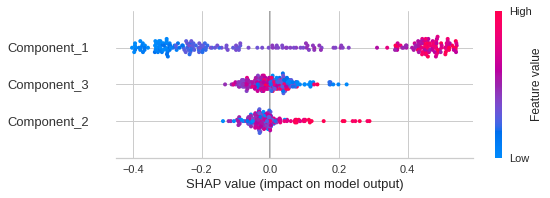

In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

## **Visualize Single Prediction**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')